In [1]:
#import-importan
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf # komenin dlu biar cepet 

In [2]:
#read file n liatin awalnya
df = pd.read_csv('D:/Kuliah/Matkul/Semester 6/Bangkit/Capstone Project/Room-Pricing-Bukit-Vista/data/raw_data.csv')
df.head(20)

,unit_name,bedroom,bathroom,beds,guests,type,unit_id,wifi,tv,cable_tv,...,room_name,booking_received_timestamp,booking_check_in,booking_check_out,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned,average_daily_rate
0,Apartment - 1 Lantai 1,1,1.0,1.0,2.0,Bingin Ombak Apartment - 1 Lantai 1,UN1539,1,0,0,...,Bingin Ombak Apartment - 1 Lantai 1,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
1,Apartment - 2 Lantai 2,1,1.0,1.0,2.0,Bingin Ombak Apartment - 2 Lantai 2,UN1540,1,0,0,...,Bingin Ombak Apartment - 2 Lantai 2,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
2,Apartment - 2 Lantai 2,1,1.0,1.0,2.0,Bingin Ombak Apartment - 2 Lantai 2,UN1540,1,0,0,...,Bingin Ombak Apartment - 2 Lantai 2,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
3,Standard 2,1,2.0,1.0,2.0,Standard,UN1536,1,0,0,...,Standard (PLEASE IGNORE),2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
4,Standard 1,1,2.0,1.0,2.0,Standard,UN0165,1,0,0,...,Standard (PLEASE IGNORE),2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
5,Standard 3,1,3.0,1.0,2.0,Standard,UN1537,1,0,0,...,Standard (PLEASE IGNORE),2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
6,Standard 4,1,1.0,1.0,2.0,Standard,UN1538,1,0,0,...,Standard (PLEASE IGNORE),2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
7,Apartment - 1 Lantai 1,1,1.0,1.0,2.0,Bingin Ombak Apartment - 1 Lantai 1,UN1539,1,0,0,...,Bingin Ombak Apartment - 1 Lantai 1,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
8,Apartment - 2 Lantai 2,1,1.0,1.0,2.0,Bingin Ombak Apartment - 2 Lantai 2,UN1540,1,0,0,...,Apartment 2 Lantai 2,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
9,Standard 4,1,1.0,1.0,2.0,Standard,UN1538,1,0,0,...,Standard,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06


In [3]:
# lihat unique values tiap kolom
for column in df.columns:
    unique_values = df[column].unique()

    # print kolom dan unique value masing-masing
    print(f"Unique values di kolom '{column}':")
    print(unique_values)
    print()

Unique values di kolom 'unit_name':
['Apartment - 1 Lantai 1' 'Apartment - 2 Lantai 2' 'Standard 2'
 'Standard 1' 'Standard 3' 'Standard 4' 'Room 06 (Downstairs)'
 'Room 05 (Downstairs)' 'Room 10 (Upstairs)' 'Room 09 (Upstairs)'
 'Room 08 (Upstairs)' 'Room 04 (Downstairs)' 'Room 07 (Downstairs)'
 'Me Villa A' 'E' 'C' 'B' 'D' 'Room 01' 'Room 04' 'Room 12' 'Room 11'
 'Room 03' 'Room 09' 'Room 10' 'Room 02' 'Room 05' '224' '220' '101' '219'
 '222' '214' '215' '216' '218' '221' '217' '105' '106' '107' '104'
 'Standard 4A' 'Standard 3A' 'Bungalow 2' 'Bungalow 3' 'Bungalow 4'
 'Bungalow 1' 'Room 4' 'Room 1' 'Unit 5 (Upstairs)' 'Unit 4 (Upstairs)'
 'Unit 3 (Upstairs)' 'Unit 2 (Downstairs)' 'Unit 1 (Downstairs)'
 'Bungalow 5' 'Wooden 103' 'Pondok Lulik - Wooden 102 #T'
 'Room 08 Downstairs' 'Room 07 Downstairs' 'Room 19' 'Room 18'
 'Room 09 Downstairs' 'Room 10 Downstairs' 'Room 16 Upstairs' 'Room 20'
 'Room 21' 'Room 22' 'Room 23' 'Guesthouse 3' 'Guesthouse 2'
 'Guesthouse 1' 'Guesthouse 4' '

In [4]:
df.shape


(78010, 47)

In [5]:
# liat dimensi dataframe
df.describe()


,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,workspace,essentials,...,property_bedrooms,lat,lng,distance_to_coastline,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned,average_daily_rate
count,78010.000000,77920.000000,77920.000000,77920.000000,78010.000000,78010.000000,78010.000000,78010.000000,78010.000000,78010.0,...,78010.000000,77816.000000,77816.000000,45343.000000,78010.000000,78010.000000,72671.000000,77230.000000,7.801000e+04,7.801000e+04
mean,1.035137,1.054864,1.047857,2.086679,0.978823,0.532265,0.089796,0.974696,0.899282,1.0,...,13.234765,-8.761119,115.146185,670.379297,28.425099,3.539892,0.631665,4.404959,2.296312e+06,6.777725e+05
std,0.306131,0.383144,0.324730,0.522380,0.143974,0.498961,0.285891,0.157049,0.300957,0.0,...,7.730403,0.103751,0.388802,1414.130566,40.994812,3.830646,0.487256,0.942341,2.977614e+06,6.287251e+05
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,1.000000,-8.837896,110.360967,12.924400,-1.000000,1.000000,-1.000000,1.000000,-2.590644e+06,-2.590644e+06
25%,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0,...,6.000000,-8.822391,115.087110,65.860300,2.000000,2.000000,0.600000,4.000000,8.501970e+05,3.801168e+05
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,13.000000,-8.809038,115.113060,402.195000,12.000000,3.000000,0.900000,5.000000,1.463267e+06,5.001512e+05
75%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,22.000000,-8.678881,115.133906,761.362000,37.000000,4.000000,0.900000,5.000000,2.700462e+06,7.801720e+05
max,5.000000,5.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,27.000000,-7.728722,115.586846,14402.100000,333.000000,91.000000,1.000000,5.000000,6.137459e+07,1.003399e+07


In [6]:
# liat apakah null
print('jumlah null pada tiap kolom: ', df.isnull().sum(),'\n\n')

# habiskan
df.drop_duplicates(inplace=True)


jumlah null pada tiap kolom:  unit_name                         0
bedroom                           0
bathroom                         90
beds                             90
guests                           90
type                              0
unit_id                           0
wifi                              0
tv                                0
cable_tv                          0
ac                                0
workspace                         0
essentials                        0
hot_water                         0
parking                           0
pool                              0
gym                               0
private_entrance                  0
luggage_drop_off                  0
hanger                            0
lock                              0
linens                            0
garden                            0
balcony                           0
kitchen                           0
breakfast                         0
heating                           

In [7]:
df.shape

(60751, 47)

In [8]:
df.describe()

,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,workspace,essentials,...,property_bedrooms,lat,lng,distance_to_coastline,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned,average_daily_rate
count,60751.000000,60661.000000,60661.000000,60661.000000,60751.000000,60751.000000,60751.000000,60751.000000,60751.000000,60751.0,...,60751.000000,60605.000000,60605.000000,36831.000000,60751.000000,60751.000000,56595.000000,60060.000000,6.075100e+04,6.075100e+04
mean,1.043012,1.069699,1.053593,2.084783,0.974288,0.511432,0.084591,0.968033,0.886175,1.0,...,13.374447,-8.759099,115.127129,712.255805,25.258745,3.665059,0.625809,4.411272,2.108534e+06,6.039028e+05
std,0.335318,0.421037,0.349432,0.548068,0.158275,0.499873,0.278275,0.175912,0.317602,0.0,...,7.636814,0.110043,0.415362,1518.649575,37.492060,4.117022,0.490024,0.935330,2.515665e+06,4.769123e+05
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,1.000000,-8.837896,110.360967,12.924400,-1.000000,1.000000,-1.000000,1.000000,-2.590644e+06,-2.590644e+06
25%,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0,...,6.000000,-8.822391,115.087110,107.471000,2.000000,2.000000,0.600000,4.000000,8.301110e+05,3.705512e+05
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,13.000000,-8.809038,115.113060,402.195000,10.000000,3.000000,0.900000,5.000000,1.406298e+06,4.750933e+05
75%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,22.000000,-8.675762,115.132340,1030.110000,33.000000,4.000000,0.900000,5.000000,2.500511e+06,6.931355e+05
max,5.000000,5.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,27.000000,-7.728722,115.586846,14402.100000,333.000000,91.000000,1.000000,5.000000,6.137459e+07,1.003399e+07


In [9]:
# drop kolom-kolom
df.drop(columns=['room_name', 'property_bedrooms','booking_received_timestamp', 'essentials', 'unit_name', 'unit_id', 'type'], inplace=True)

#### alasan drop kolom kolom diatas:

- essentials    = hanya 1 value yaitu '1'
- type          = isinya sama dengan room_name
- sisanya tidak relevan untuk prediksi

In [10]:
df.shape

(60751, 40)

In [11]:
df.describe()

,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,workspace,hot_water,...,building_staff,lat,lng,distance_to_coastline,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned,average_daily_rate
count,60751.000000,60661.000000,60661.000000,60661.000000,60751.000000,60751.000000,60751.000000,60751.000000,60751.000000,60751.000000,...,60751.000000,60605.000000,60605.000000,36831.000000,60751.000000,60751.000000,56595.000000,60060.000000,6.075100e+04,6.075100e+04
mean,1.043012,1.069699,1.053593,2.084783,0.974288,0.511432,0.084591,0.968033,0.886175,0.695544,...,0.324472,-8.759099,115.127129,712.255805,25.258745,3.665059,0.625809,4.411272,2.108534e+06,6.039028e+05
std,0.335318,0.421037,0.349432,0.548068,0.158275,0.499873,0.278275,0.175912,0.317602,0.460180,...,0.468181,0.110043,0.415362,1518.649575,37.492060,4.117022,0.490024,0.935330,2.515665e+06,4.769123e+05
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.837896,110.360967,12.924400,-1.000000,1.000000,-1.000000,1.000000,-2.590644e+06,-2.590644e+06
25%,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,-8.822391,115.087110,107.471000,2.000000,2.000000,0.600000,4.000000,8.301110e+05,3.705512e+05
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,-8.809038,115.113060,402.195000,10.000000,3.000000,0.900000,5.000000,1.406298e+06,4.750933e+05
75%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,-8.675762,115.132340,1030.110000,33.000000,4.000000,0.900000,5.000000,2.500511e+06,6.931355e+05
max,5.000000,5.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,-7.728722,115.586846,14402.100000,333.000000,91.000000,1.000000,5.000000,6.137459e+07,1.003399e+07


In [12]:
# memfilter kolom numerik saja 
numeric_columns = df.select_dtypes(include=['number'])

# buat dataframe ter-interpolasi
df_interpolated = numeric_columns.interpolate(method='polynomial', order=2)

# buat dataframe ter-normalisasi
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(numeric_columns), columns=numeric_columns.columns)

# buat dataframe ter-interpolasi dan normalisasi
df_normalized_interpolated = pd.DataFrame(scaler.fit_transform(df_interpolated), columns=numeric_columns.columns)

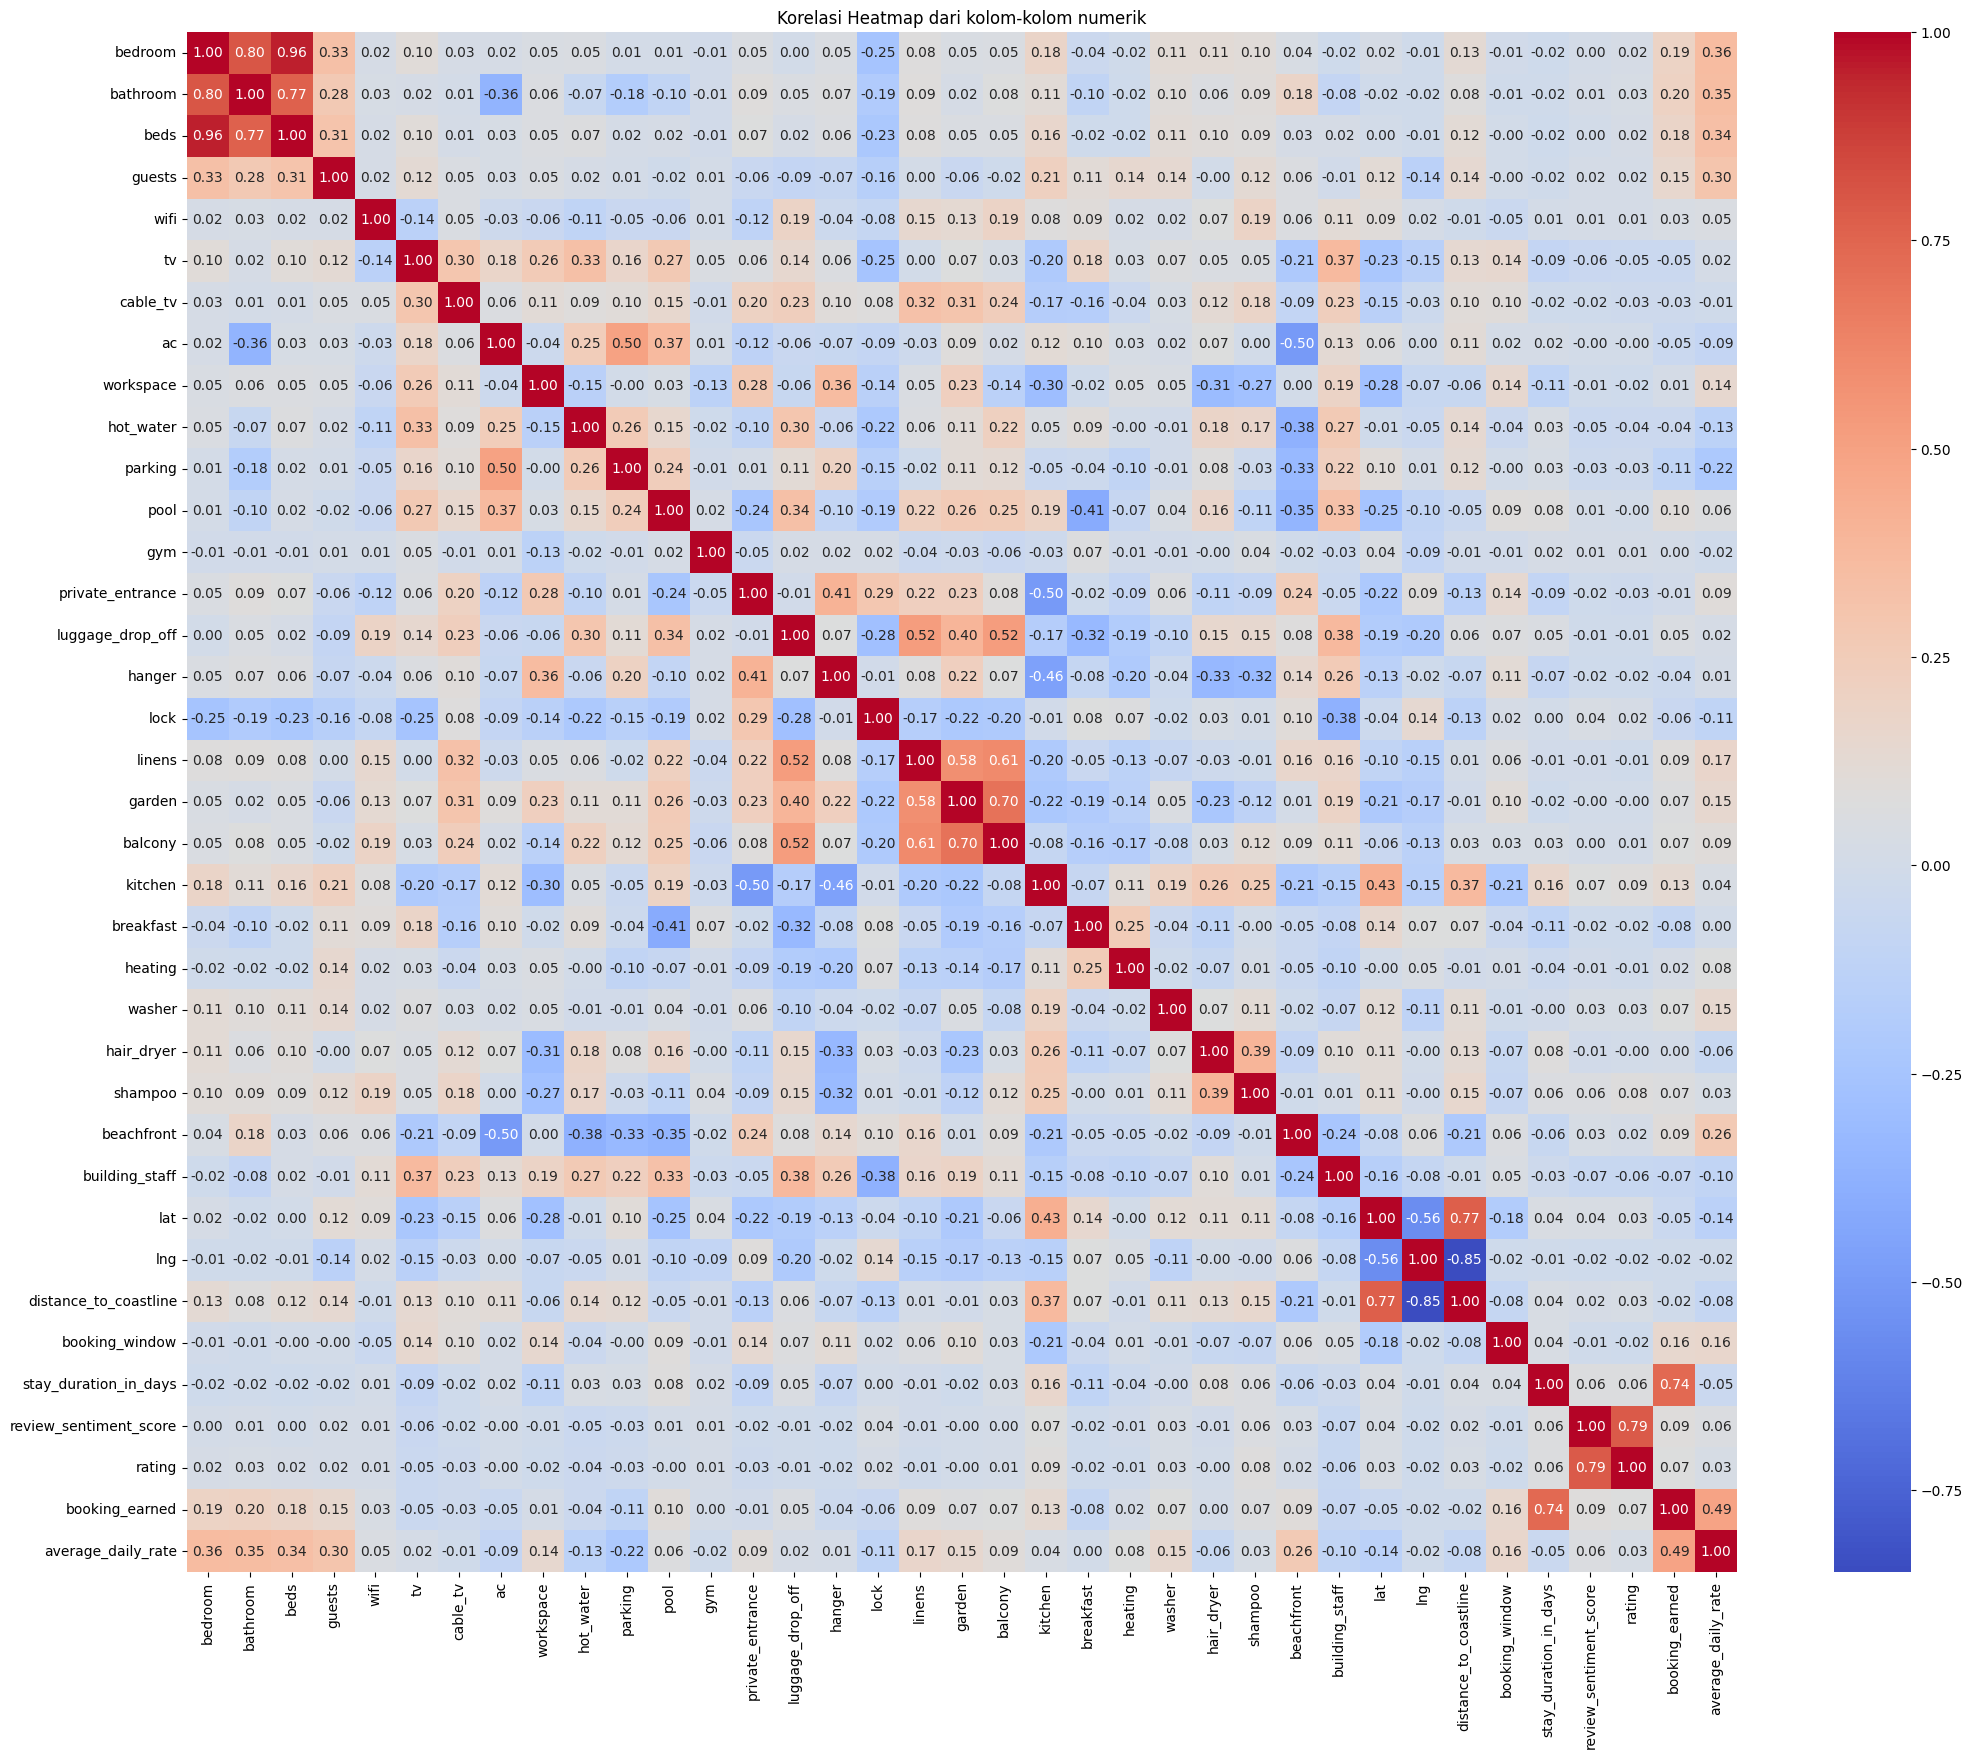

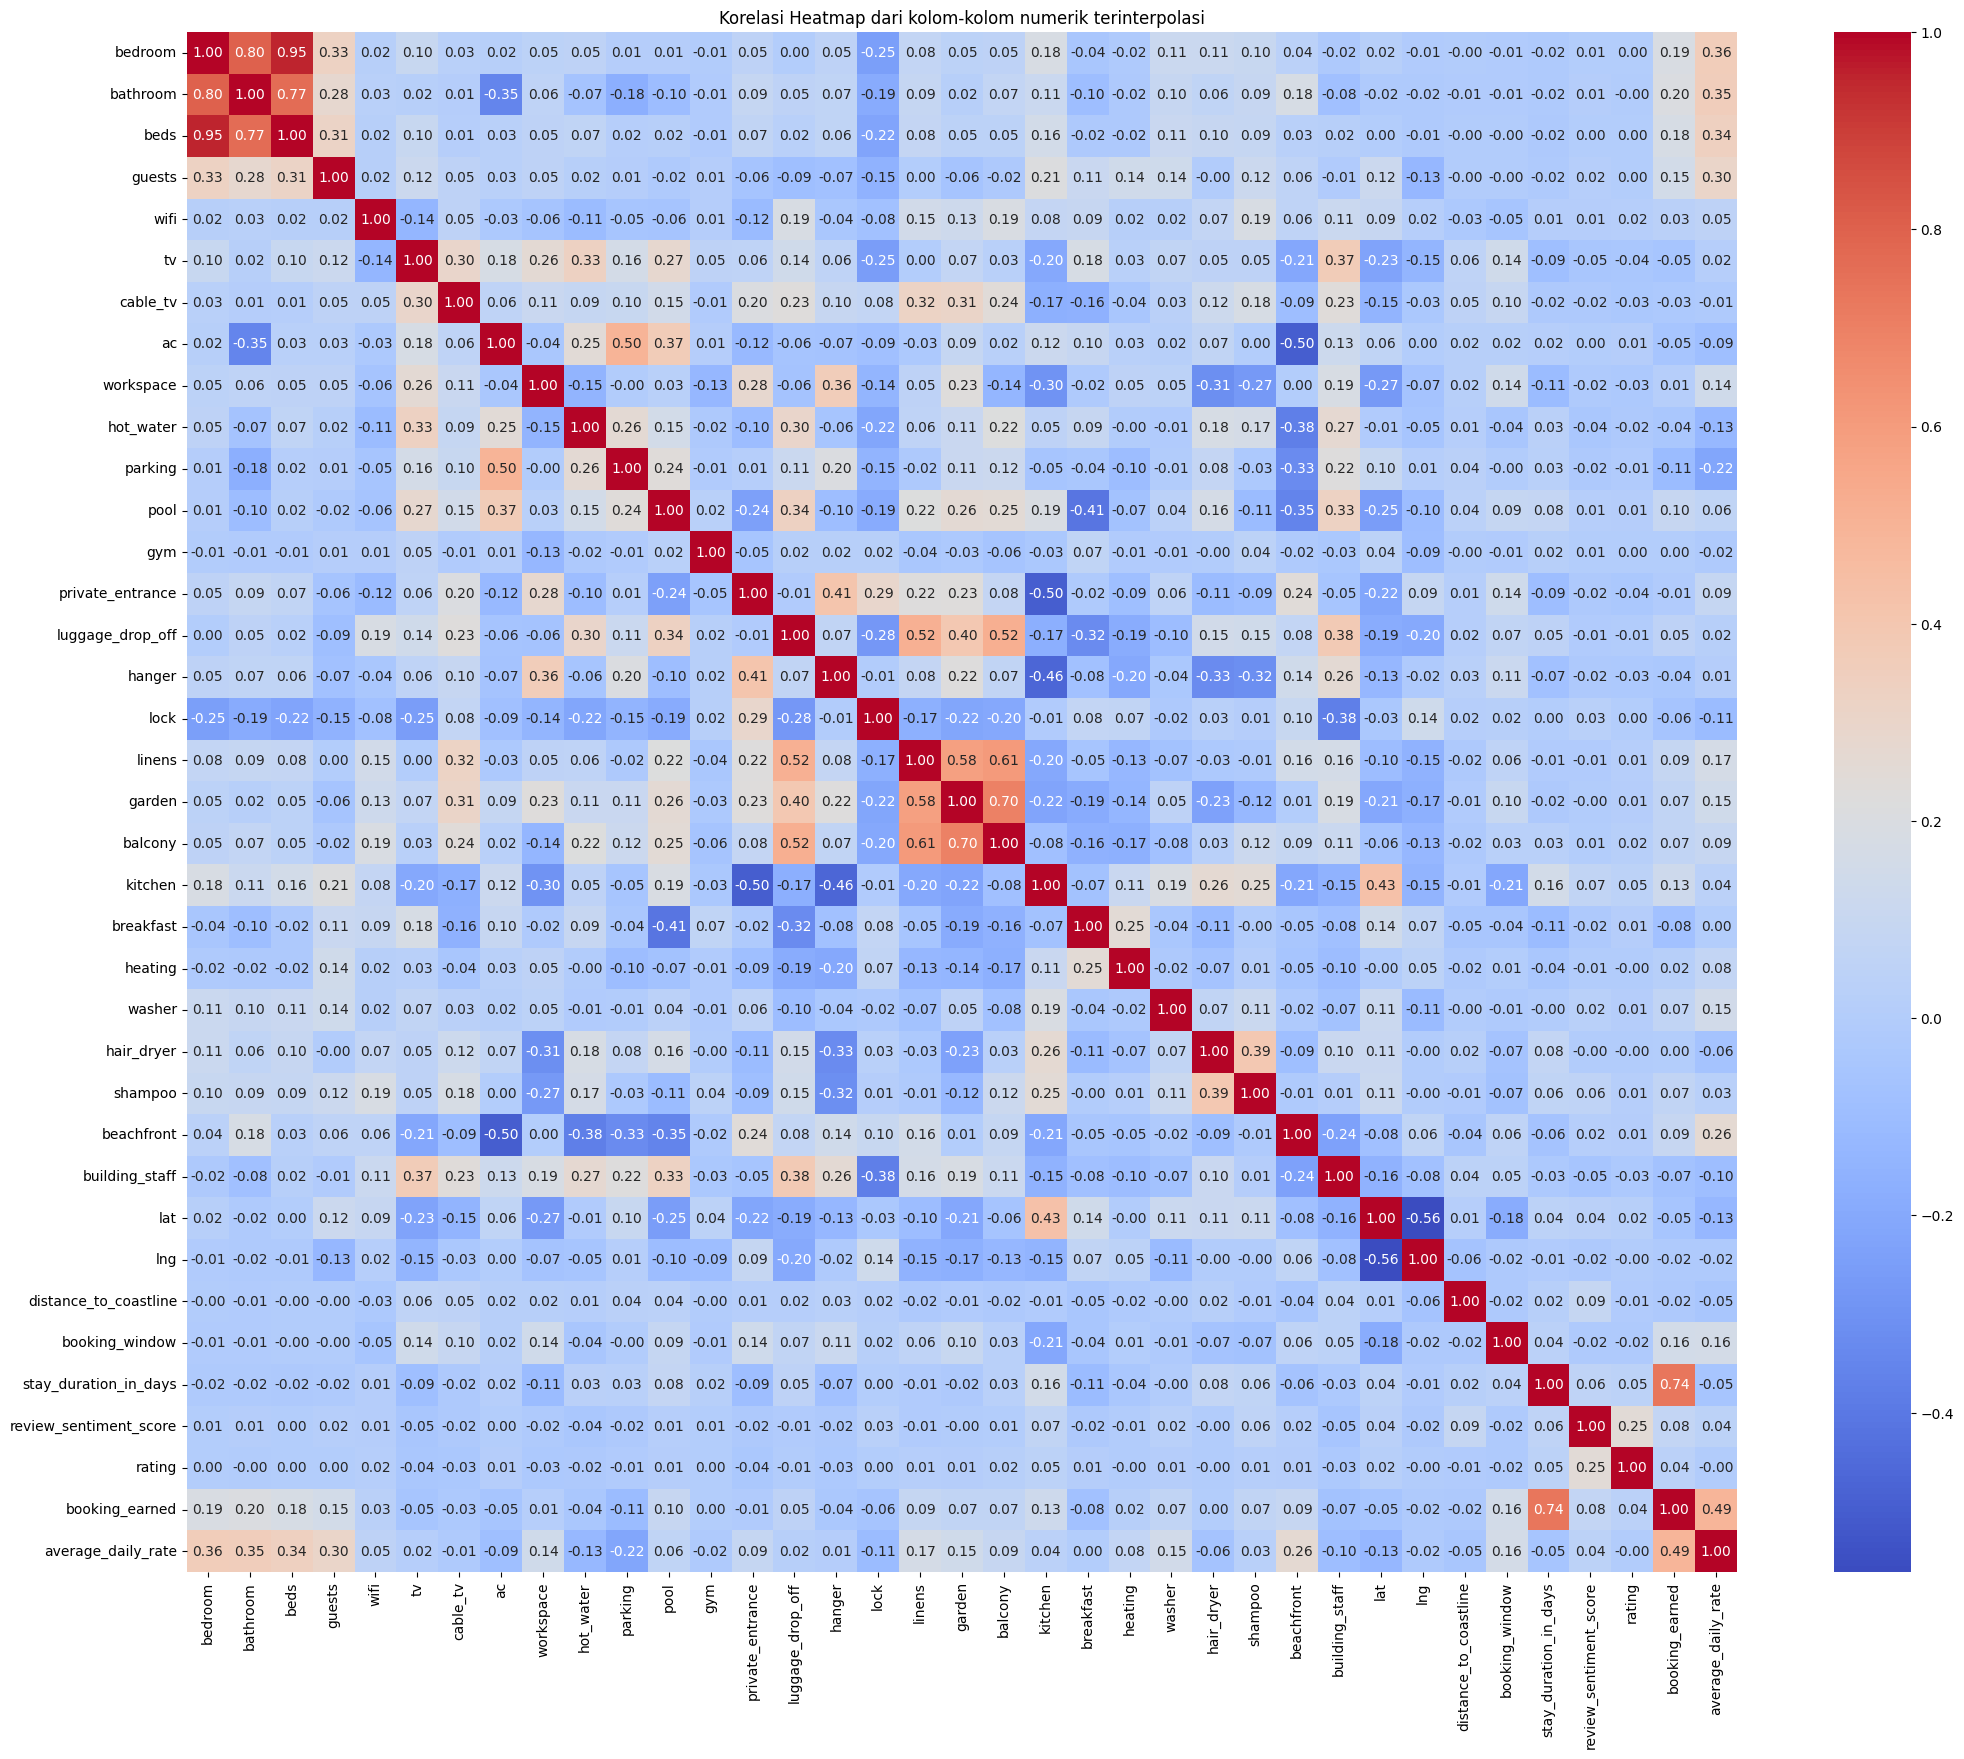

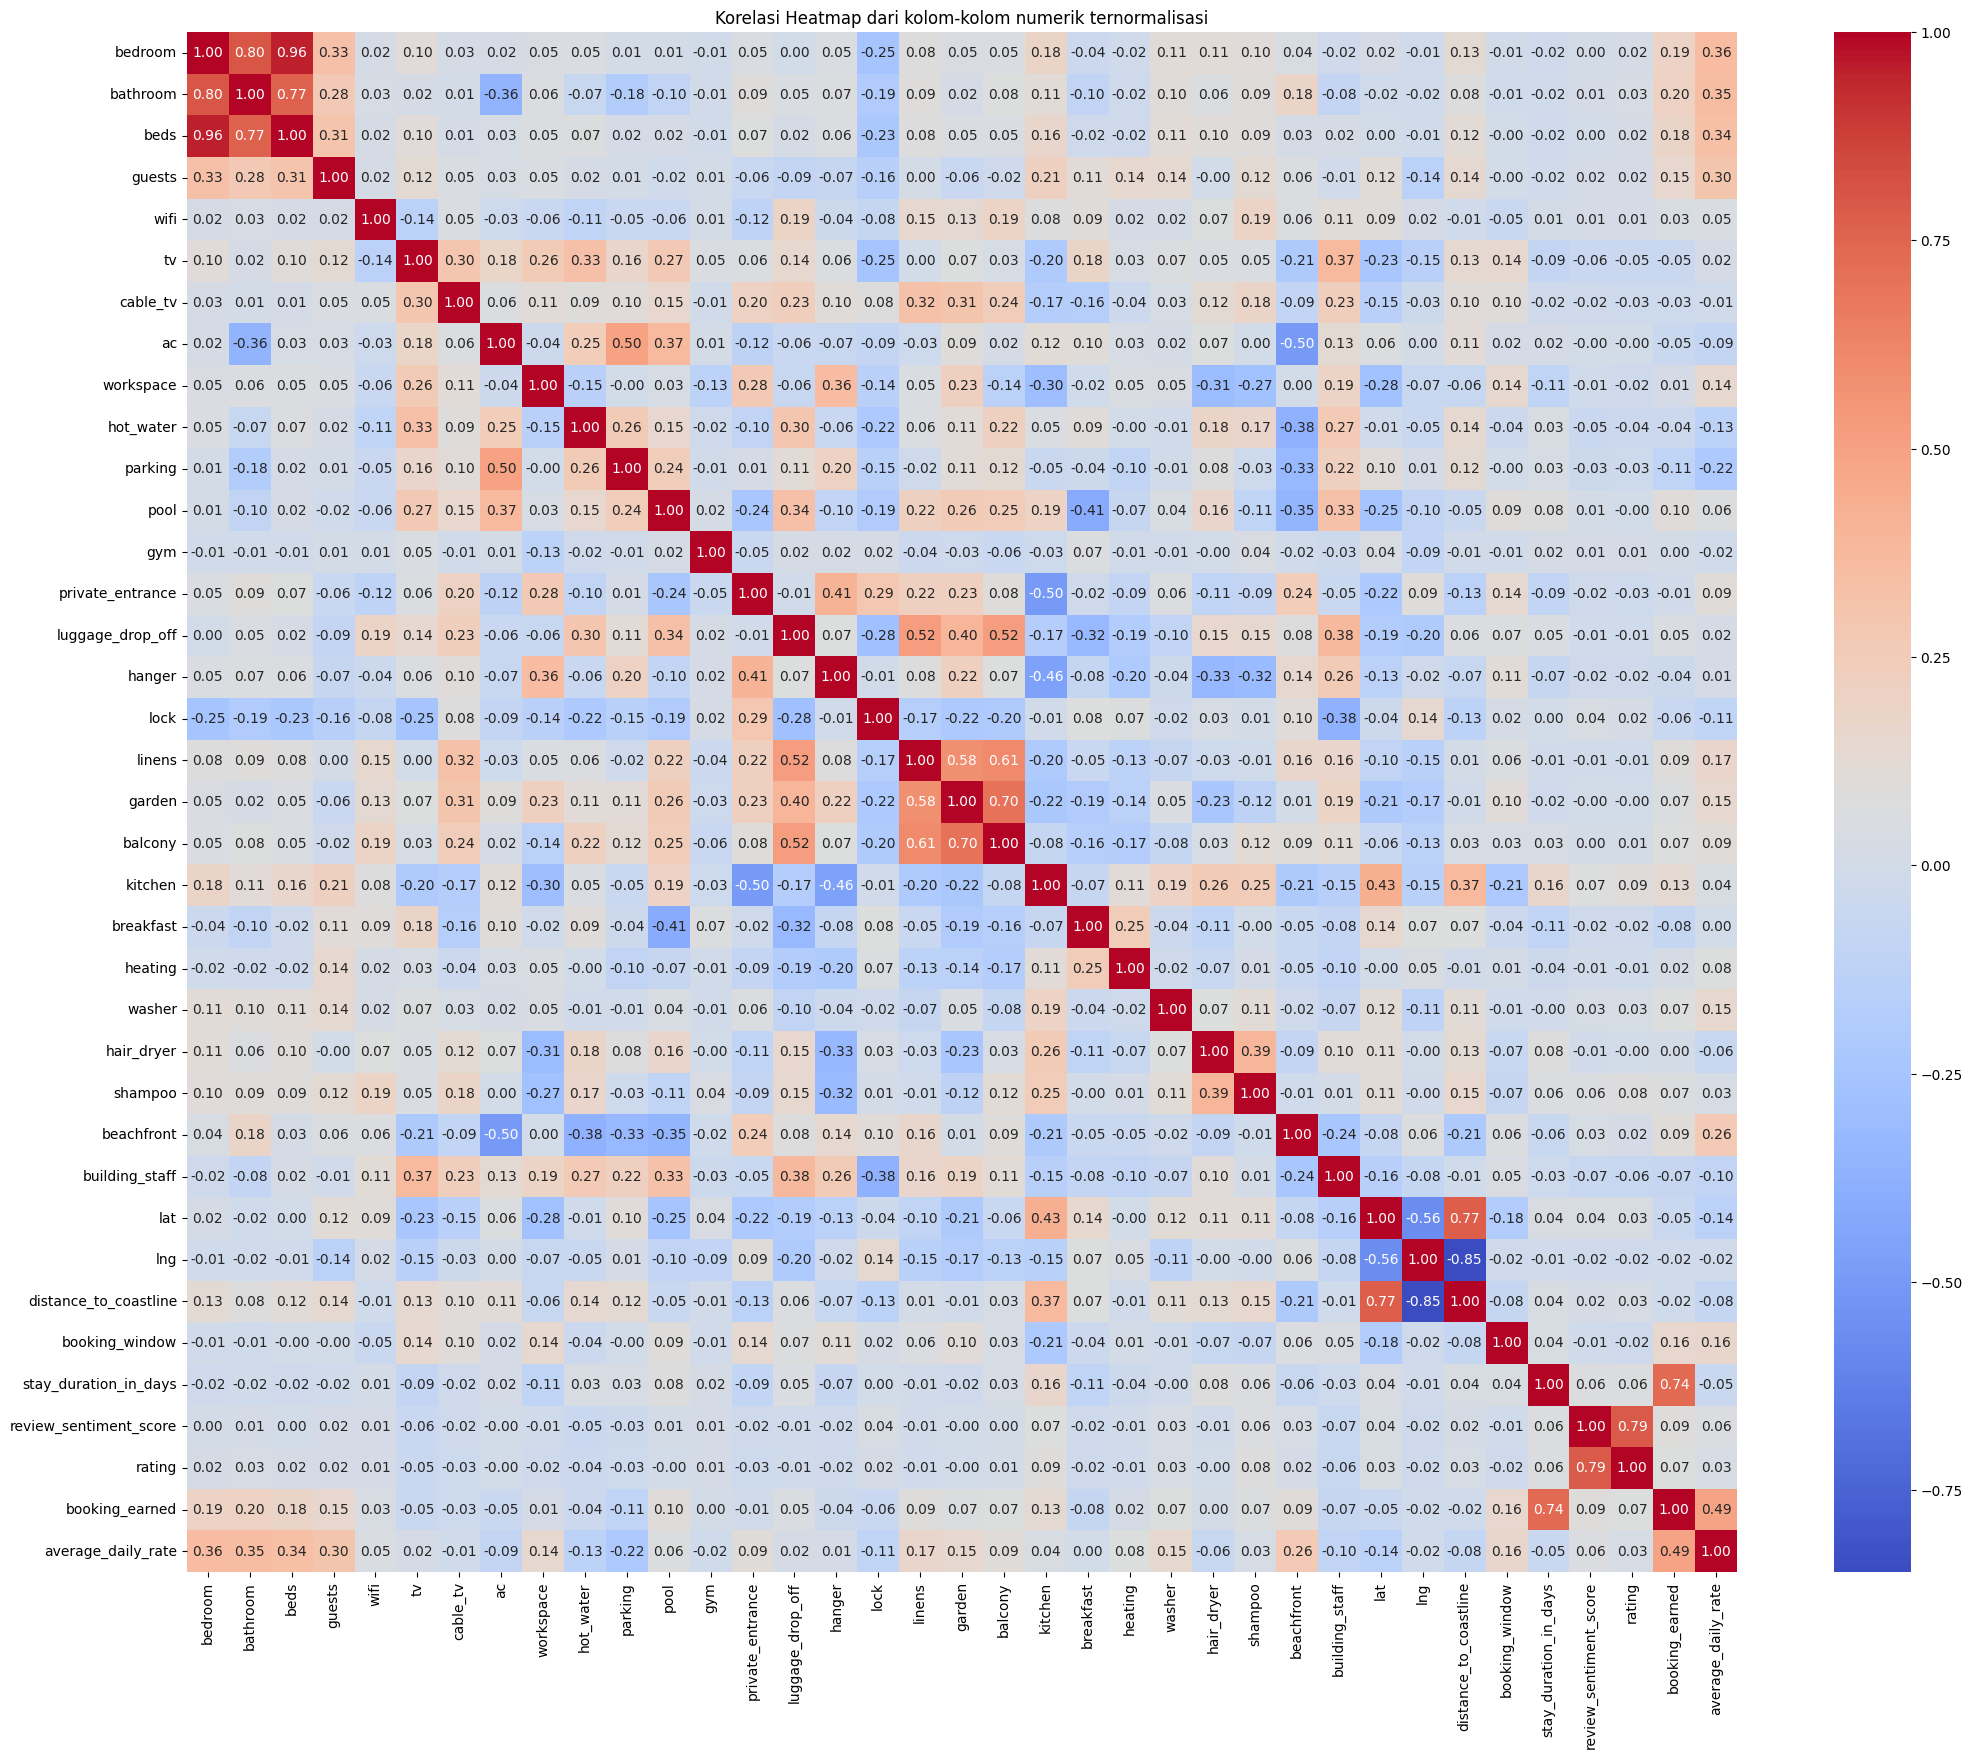

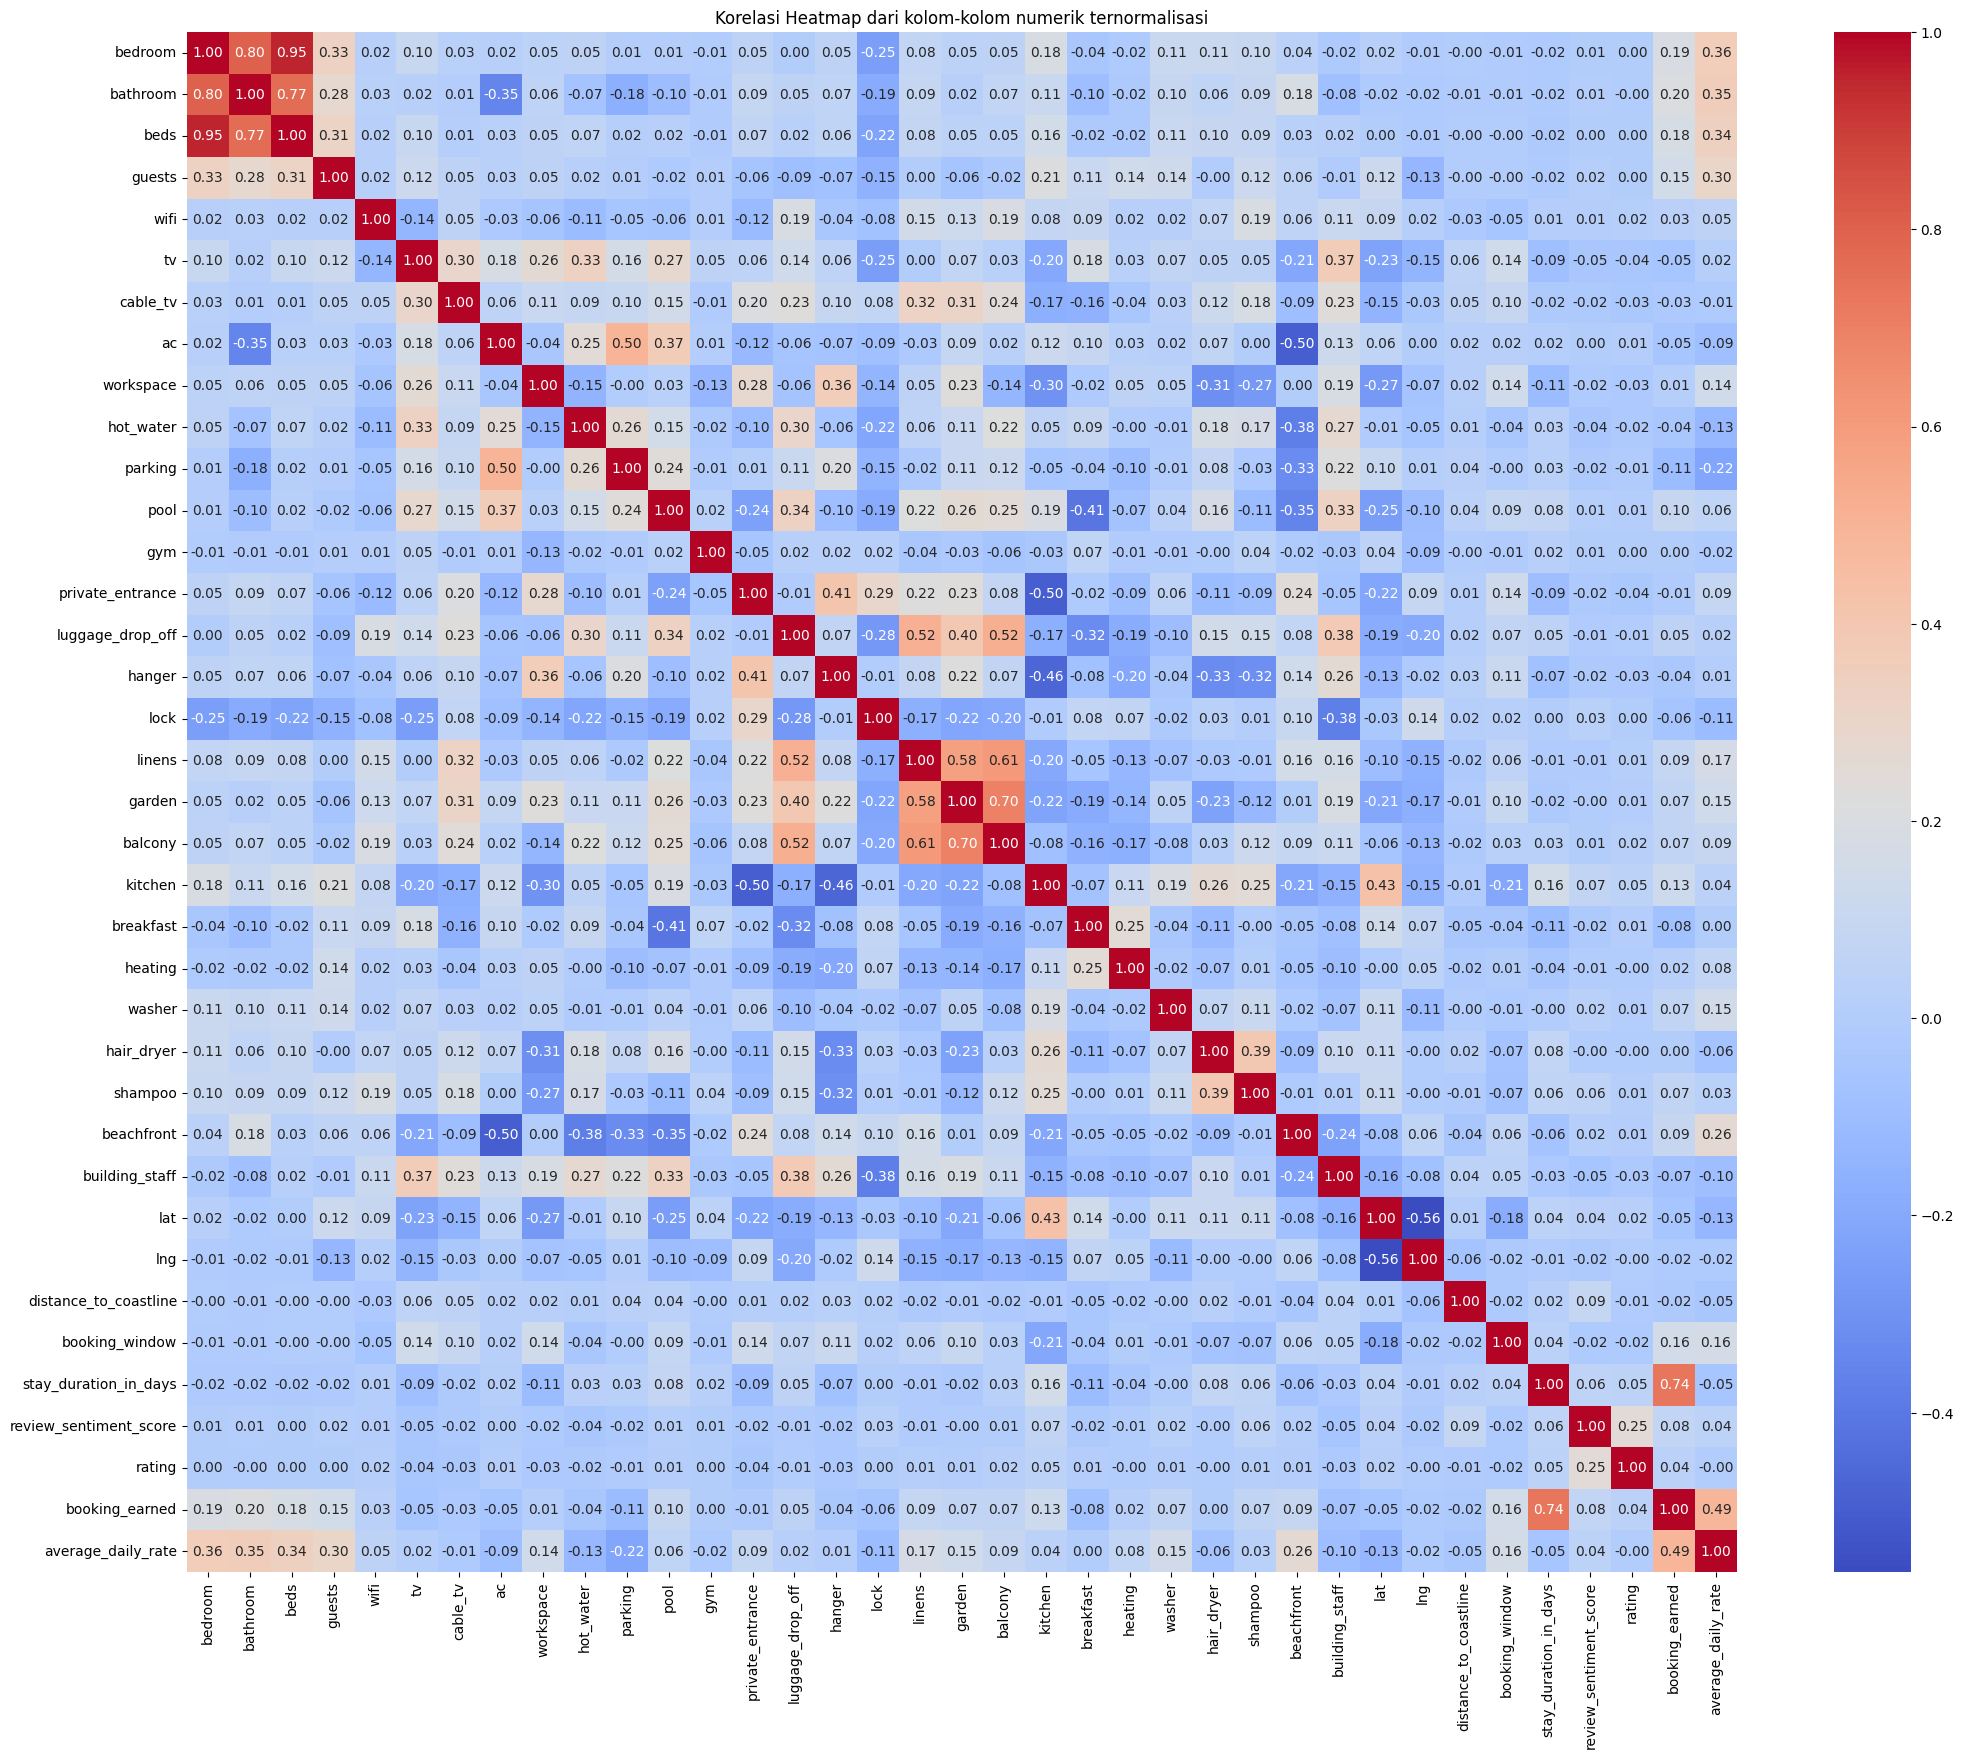

(60751, 40)

In [13]:
#buat heatmap korelasi
plt.figure(figsize=(25,20))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Heatmap dari kolom-kolom numerik')
plt.show()
df.shape

# coba coba entar
# df.interpolate(method='spline', order=2)

# heatmap interpolasi
plt.figure(figsize=(25,20))
sns.heatmap(df_interpolated.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Heatmap dari kolom-kolom numerik terinterpolasi')
plt.show()
df.shape

# heatmap normalisasi
plt.figure(figsize=(25,20))
sns.heatmap(df_normalized.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Heatmap dari kolom-kolom numerik ternormalisasi')
plt.show()
df.shape

# heatmap normalisasi + interpolasi
plt.figure(figsize=(25,20))
sns.heatmap(df_normalized_interpolated.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Heatmap dari kolom-kolom numerik ternormalisasi + interpolasi')
plt.show()
df.shape